<a href="https://colab.research.google.com/github/TaviTragus/data-science-fundamentals/blob/main/Unit7/TaviTragU7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

##**Task1**:##

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

a polynomial element can better fit trends, like with the bikes rented vs time of day having several camel humps.

##**Task2**:##

Why would you ever NOT want to include a polynomial element in a model you built?

including a polynomial element can lead to overfitting, so be careful, and check if it is actually doing something

##**Task3**:##

What's the point of using b splines?

b splines have a lot of the flexibility of polynomials with less overfitting

##**Task4**:##

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

a gaussian process uses soemthing about machine learning to make your model. it decides where the splits are for your b splines and also how many knots to have. a guassian process considers all your data and the infinite possible data or smth and for really large models might place knots on everything to consider the trends of each individual data point (i think, this is a little confusing still)

##**Task5**:##


Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model

###boring stuff and data###

In [ ]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-zfxl2lqw
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-zfxl2lqw
  Resolved https://github.com/pydata/xarray.git to commit 1189240b2631fa27dec0cbea76bf3cf977b42fce
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev12+g1189240b-py3-none-any.whl size=1249820 sha256=7895f7d002342b20a57fdf6ac998ddf6e488633834d6276c9f143488efe9c69e
  Stored in directory: /tmp/pip-ephem-wheel-cache-5kkkpk63/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 1.8 MB/s eta 0:00:00
   ━

In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb

In [ ]:
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv')
howell

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
...,...,...,...,...
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062497,21.0,0
542,71.120,8.051258,0.0,1


###models to decide num of knots###

In [ ]:
num_knots = 3
knots = np.linspace(53.975, 179.07, num_knots+2)[1:-1]
model_howell_nb_3 = bmb.Model("weight ~ bs(height, degree=3, knots=knots)", howell, family="negativebinomial")
idata_howell_nb_3 = model_howell_nb_3.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [ ]:
num_knots = 4
knots = np.linspace(53.975, 179.07, num_knots+2)[1:-1]
model_howell_nb_4 = bmb.Model("weight ~ bs(height, degree=3, knots=knots)", howell, family="negativebinomial")
idata_howell_nb_4 = model_howell_nb_4.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [ ]:
num_knots = 5
knots = np.linspace(53.975, 179.07, num_knots+2)[1:-1]
model_howell_nb_5 = bmb.Model("weight ~ bs(height, degree=3, knots=knots)", howell, family="negativebinomial")
idata_howell_nb_5 = model_howell_nb_5.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [ ]:
num_knots = 2
knots = np.linspace(53.975, 179.07, num_knots+2)[1:-1]
model_howell_nb_2 = bmb.Model("weight ~ bs(height, degree=3, knots=knots)", howell, family="negativebinomial")
idata_howell_nb_2 = model_howell_nb_2.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

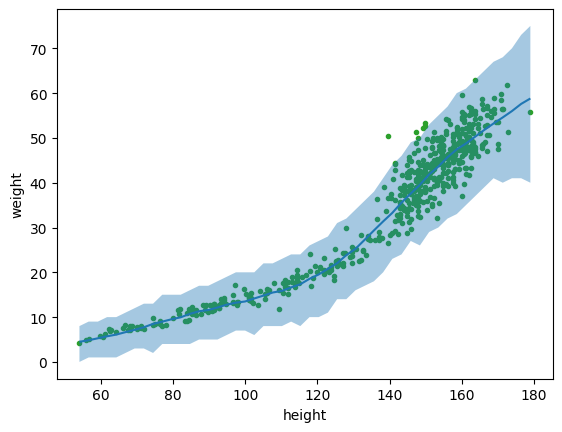

In [ ]:
bmb.interpret.plot_predictions(model_howell_nb_3, idata_howell_nb_3, "height", pps= True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


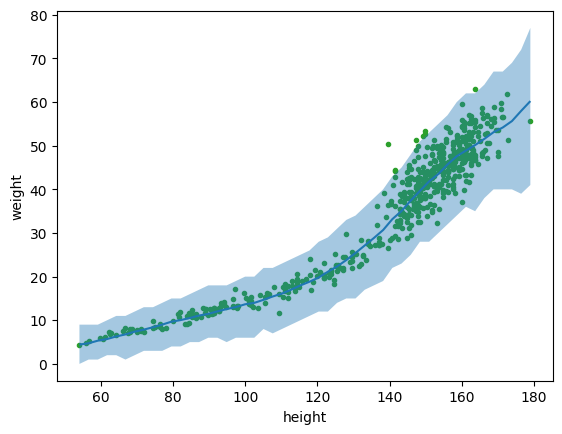

In [ ]:
bmb.interpret.plot_predictions(model_howell_nb_4, idata_howell_nb_4, "height", pps= True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


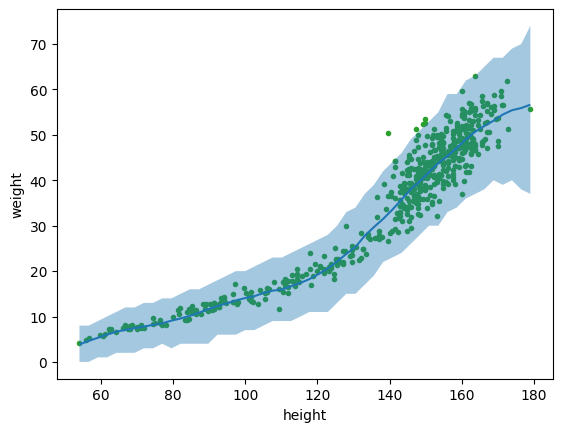

In [ ]:
bmb.interpret.plot_predictions(model_howell_nb_5, idata_howell_nb_5, "height", pps= True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


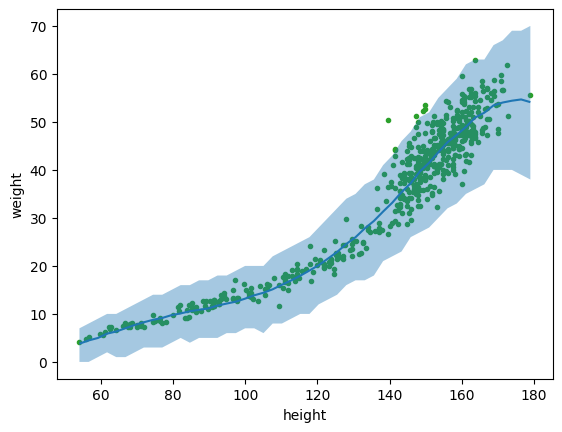

In [ ]:
bmb.interpret.plot_predictions(model_howell_nb_2, idata_howell_nb_2, "height", pps= True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

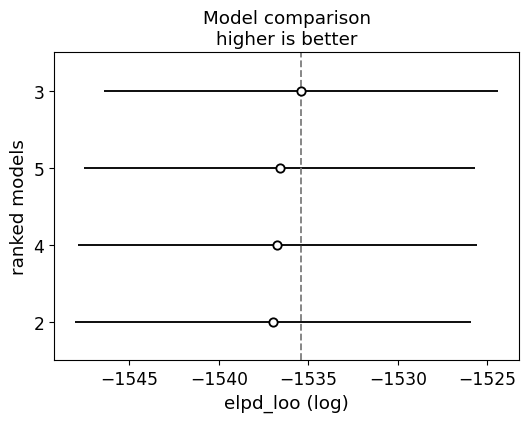

In [ ]:
cmp_df_bmb = az.compare( {"3":idata_howell_nb_3,"4":idata_howell_nb_4,"5":idata_howell_nb_5,"2":idata_howell_nb_2} )
az.plot_compare(cmp_df_bmb)

###models to decide degree of polynomials###

In [ ]:
num_knots = 3
knots = np.linspace(53.975, 179.07, num_knots+2)[1:-1]
model_howell_nb_3_1 = bmb.Model("weight ~ bs(height, degree=1, knots=knots)", howell, family="negativebinomial")
idata_howell_nb_3_1 = model_howell_nb_3_1.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [ ]:
num_knots = 3
knots = np.linspace(53.975, 179.07, num_knots+2)[1:-1]
model_howell_nb_3_2 = bmb.Model("weight ~ bs(height, degree=2, knots=knots)", howell, family="negativebinomial")
idata_howell_nb_3_2 = model_howell_nb_3_2.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [ ]:
num_knots = 3
knots = np.linspace(53.975, 179.07, num_knots+2)[1:-1]
model_howell_nb_3_3 = bmb.Model("weight ~ bs(height, degree=3, knots=knots)", howell, family="negativebinomial")
idata_howell_nb_3_3 = model_howell_nb_3_3.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [ ]:
num_knots = 3
knots = np.linspace(53.975, 179.07, num_knots+2)[1:-1]
model_howell_nb_3_4 = bmb.Model("weight ~ bs(height, degree=4, knots=knots)", howell, family="negativebinomial")
idata_howell_nb_3_4 = model_howell_nb_3_4.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [ ]:
num_knots = 3
knots = np.linspace(53.975, 179.07, num_knots+2)[1:-1]
model_howell_nb_3_5 = bmb.Model("weight ~ bs(height, degree=5, knots=knots)", howell, family="negativebinomial")
idata_howell_nb_3_5 = model_howell_nb_3_5.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


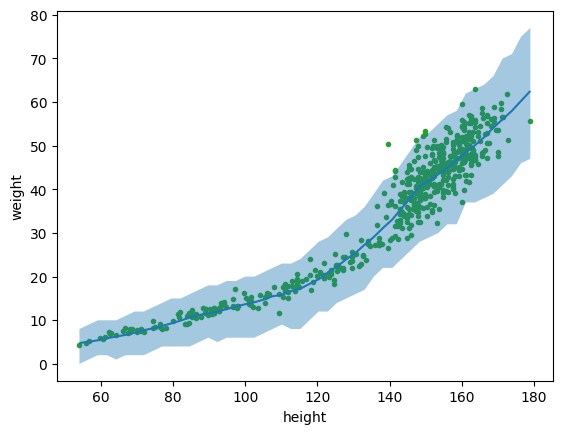

In [ ]:
bmb.interpret.plot_predictions(model_howell_nb_3_1, idata_howell_nb_3_1, "height", pps= True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


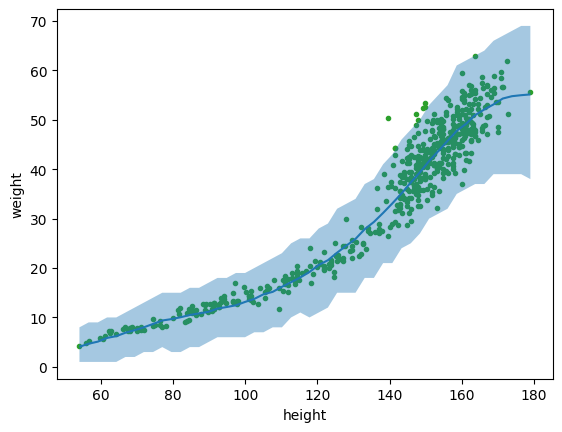

In [ ]:
bmb.interpret.plot_predictions(model_howell_nb_3_2, idata_howell_nb_3_2, "height", pps= True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


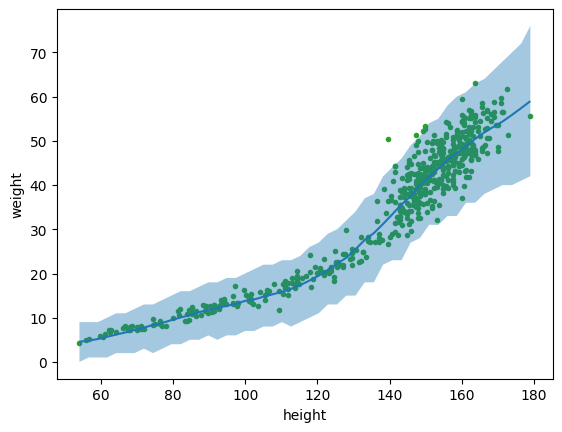

In [ ]:
bmb.interpret.plot_predictions(model_howell_nb_3_3, idata_howell_nb_3_3, "height", pps= True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


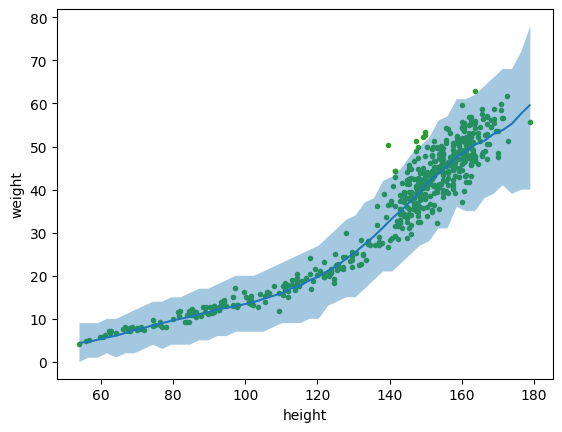

In [ ]:
bmb.interpret.plot_predictions(model_howell_nb_3_4, idata_howell_nb_3_4, "height", pps= True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


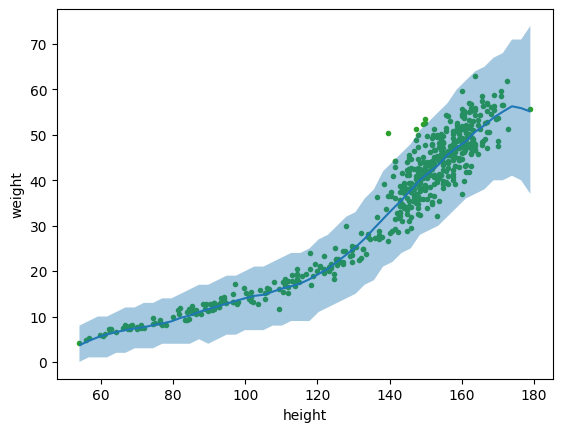

In [ ]:
bmb.interpret.plot_predictions(model_howell_nb_3_5, idata_howell_nb_3_5, "height", pps= True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

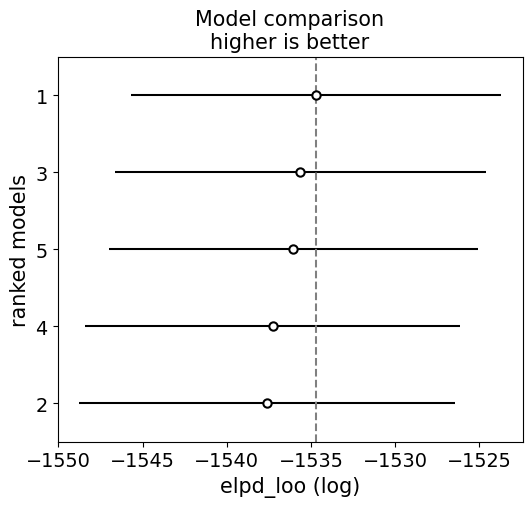

In [ ]:
cmp_df_bmb = az.compare( {"1":idata_howell_nb_3_1,"2":idata_howell_nb_3_2,"3":idata_howell_nb_3_3,"4":idata_howell_nb_3_4,"5":idata_howell_nb_3_5} )
az.plot_compare(cmp_df_bmb)

###my results###

Just according to elpd_loo, the bspline model with 3 knots and degree 1 polynomials performed the best. All of the elpd_loo ranges overlap significantly though, so they are all similarly good.

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


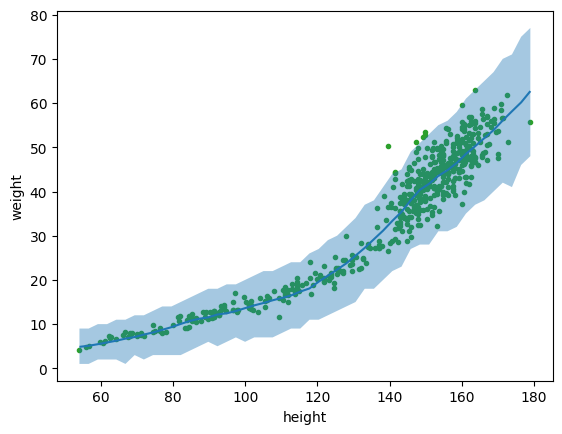

In [ ]:
bmb.interpret.plot_predictions(model_howell_nb_3_1, idata_howell_nb_3_1, "height", pps= True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

##**Task6**:##

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

I learned about how you can tell your model about uncertainties in your data and have it account for that, like if your measurements for time or co2 aren't precise, then you can tell the model. You can also combine data sets and back cast patters from more detailed data onto less detailed data.

##**Task7**:##

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

I really like the one of just data zooomed in on 1958, graphing CO2 (ppm) vs year, because it shows the difference in precision of the ice core data and the mauna loa data. I also like seeing the yearly oscillating and generaly upwards trends in the data.